In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [89]:
df=pd.read_csv(r"F:\AditiStudy_2020\ProjectUnderProgress\Housing challenge\train.csv")
df.head()

,postedby,uc,rera,bhk,b_r,sq_ft,move_ready,resale,address,LONGITUDE,LATITUDE,price
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


# Data Cleaning

In [90]:
df["city"]=df["address"].apply(lambda x:x.split(",")[1])

In [91]:
df["location"]=df["address"].apply(lambda x:x.split(",")[0])

In [92]:
df.drop(["address"],inplace=True,axis=1)

In [93]:
df.dropna(axis=0,inplace=True)

In [94]:
df.head()

,postedby,uc,rera,bhk,b_r,sq_ft,move_ready,resale,LONGITUDE,LATITUDE,price,city,location
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore,Ksfc Layout
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore,Jigani
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad,Sector-1 Vaishali
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata,New Town


In [6]:
df.to_csv("F:\AditiStudy_2020\ProjectUnderProgress\Housing challenge\CleanedTrainData.csv")

In [111]:
df=pd.read_csv(r"F:\AditiStudy_2020\ProjectUnderProgress\Housing challenge\CleanedTrainData.csv")

# Exploratory Data Analysis

In [61]:
df['bhk'].value_counts()

2     13320
3     10545
1      3572
4      1719
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: bhk, dtype: int64

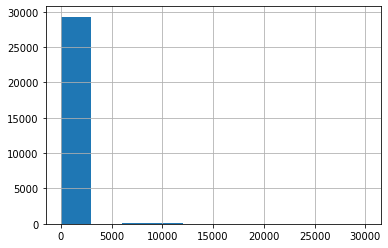

In [5]:
df.price.hist()

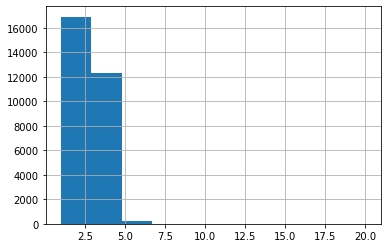

In [6]:
df.bhk.hist()

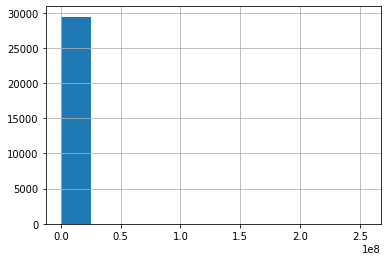

In [7]:
df.sq_ft.hist()

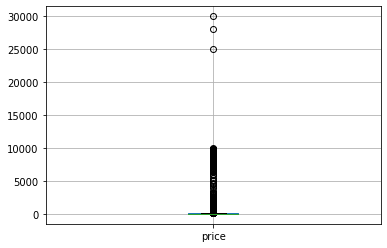

In [8]:
df.boxplot(column=["price"])

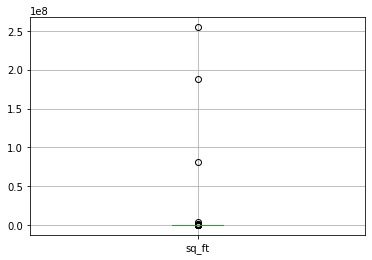

In [9]:
df.boxplot(column=["sq_ft"])

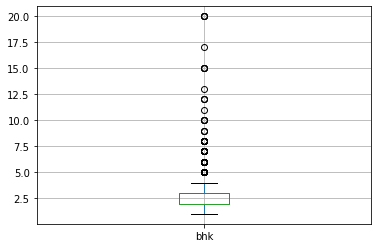

In [33]:
df.boxplot(column=["bhk"])

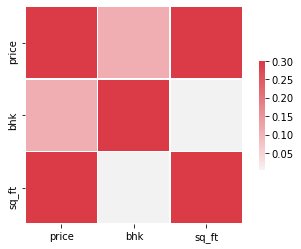

In [14]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[["price","bhk","sq_ft"]].corr(),vmax=.3,center=0,cmap=cmap,square=True,linewidth=.5,cbar_kws={"shrink":.5})

In [46]:
df_cat = df[["postedby","uc","rera","b_r","move_ready","resale","city","location"]]

graph for postedby: total=3


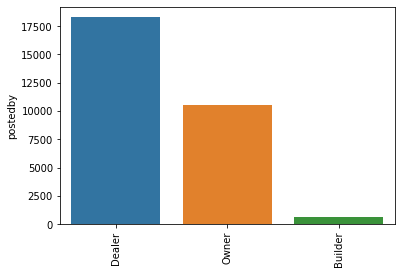

graph for uc: total=2


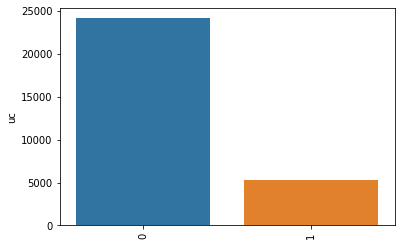

graph for rera: total=2


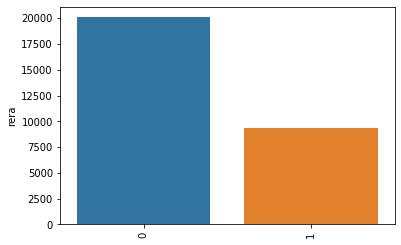

graph for b_r: total=2


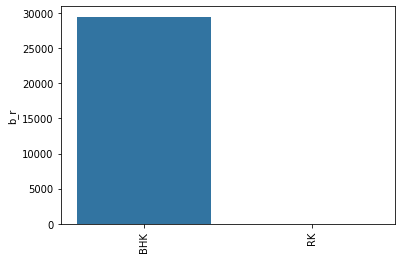

graph for move_ready: total=2


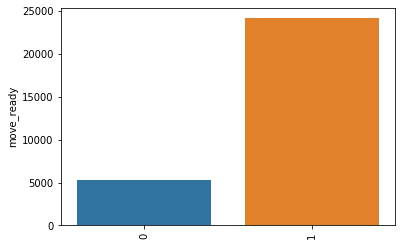

graph for resale: total=2


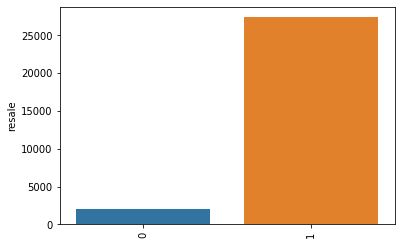

graph for city: total=432


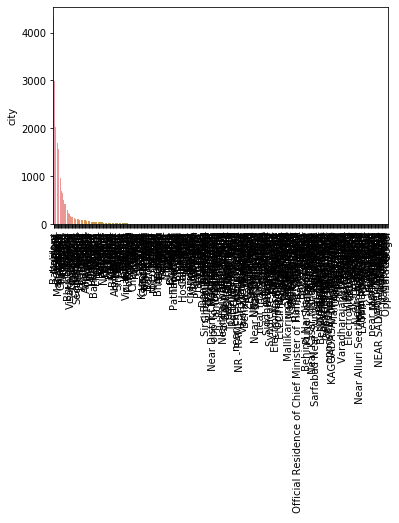

graph for location: total=5883


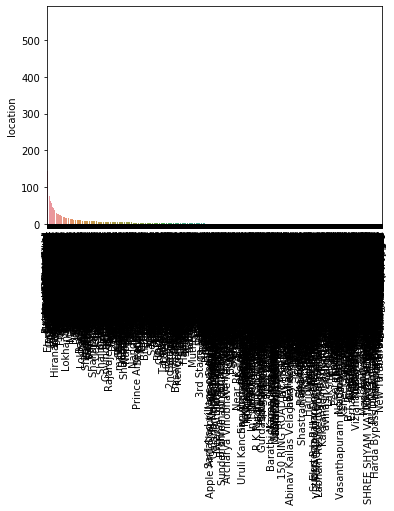

In [48]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("graph for %s: total=%d"%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for city: total=13


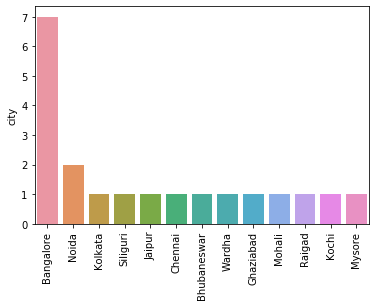

graph for location: total=20


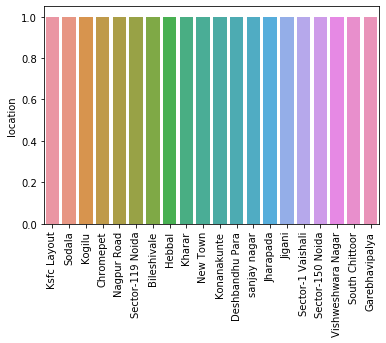

In [51]:
for i in df_cat[["city","location"]].columns:
    cat_num=df_cat[i][:20].value_counts()
    print("graph for %s: total=%d"%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [67]:
pd.pivot_table(df,index="rera",values="price")

,price
rera,
0,112.566951
1,207.974586


In [73]:
piv=pd.pivot_table(df,index="city",values="price").sort_values("price",ascending=False)
piv.head()

,price
city,
pudupalayam,650.000000
haudin road,530.000000
Gurgaon,390.591395
Vidisha,320.000000
Maharashtra,310.662921


In [72]:
piv.tail()

,price
city,
Bhuj,10.5
karjat,10.0
Near District Hospital Korba,8.5
Pali,7.4
Bankura,5.3


# Model Building (Multilinear Regression) 

In [18]:
#multilinear regression

In [10]:
df.describe()

,uc,rera,bhk,sq_ft,move_ready,resale,LONGITUDE,LATITUDE,price
count,29440.000000,29440.000000,29440.000000,2.944000e+04,29440.000000,29440.000000,29440.000000,29440.000000,29440.000000
mean,0.179755,0.318037,2.392187,1.980905e+04,0.820245,0.929552,21.301682,76.841945,142.921962
std,0.383990,0.465722,0.878962,1.901690e+06,0.383990,0.255905,6.200557,10.534768,657.000671
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000223e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175058e+03,1.000000,1.000000,20.750000,77.324551,62.000000
75%,0.000000,1.000000,3.000000,1.550638e+03,1.000000,1.000000,26.900926,77.834720,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


# Rmoving Outliers

In [112]:
Q1=df.bhk.quantile(0.25)
Q3=df.bhk.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df = df[(df.bhk>lower)&(df.bhk<upper)]

In [113]:
Q1=df.sq_ft.quantile(0.25)
Q3=df.sq_ft.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df = df[(df.sq_ft>lower)&(df.sq_ft<upper)]

In [114]:
Q1=df.price.quantile(0.25)
Q3=df.price.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df = df[(df.price>lower)&(df.price<upper)]

In [115]:
Q1=df.LONGITUDE.quantile(0.25)
Q3=df.LONGITUDE.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df = df[(df.LONGITUDE>lower)&(df.LONGITUDE<upper)]

In [116]:
Q1=df.LATITUDE.quantile(0.25)
Q3=df.LATITUDE.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df = df[(df.LATITUDE>lower)&(df.LATITUDE<upper)]

In [117]:
df.to_csv("F:\AditiStudy_2020\ProjectUnderProgress\Housing challenge\TrainDataWithoutOutliers.csv")

In [118]:
df=pd.read_csv(r"F:\AditiStudy_2020\ProjectUnderProgress\Housing challenge\TrainDataWithoutOutliers.csv")

# Model using Sklearn

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [22]:
lm=LinearRegression()

In [72]:
df.head()

,postedby,uc,rera,bhk,b_r,sq_ft,move_ready,resale,LONGITUDE,LATITUDE,price,city,location
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore,Ksfc Layout
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore,Jigani
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad,Sector-1 Vaishali
5,Owner,0,0,3,BHK,1250.000000,1,1,10.033280,76.282571,42.0,Kochi,South Chittoor


In [73]:
df["postedby2"]=df.postedby.replace({"Owner":1,"Dealer":2,"Builder":3})

In [84]:
z=df[["uc","bhk","sq_ft","rera","resale","postedby2","move_ready","LONGITUDE","LATITUDE"]]

In [85]:
lm.fit(z,df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
lm.intercept_

211.5082151647584

In [77]:
lm.coef_

array([ 1.66026463,  6.15935244,  0.03352095,  5.66957509, -1.66026463,
        9.46142243, 18.12312675, -1.35595327, -2.73993313])

In [86]:
Y_hat=lm.predict(z)

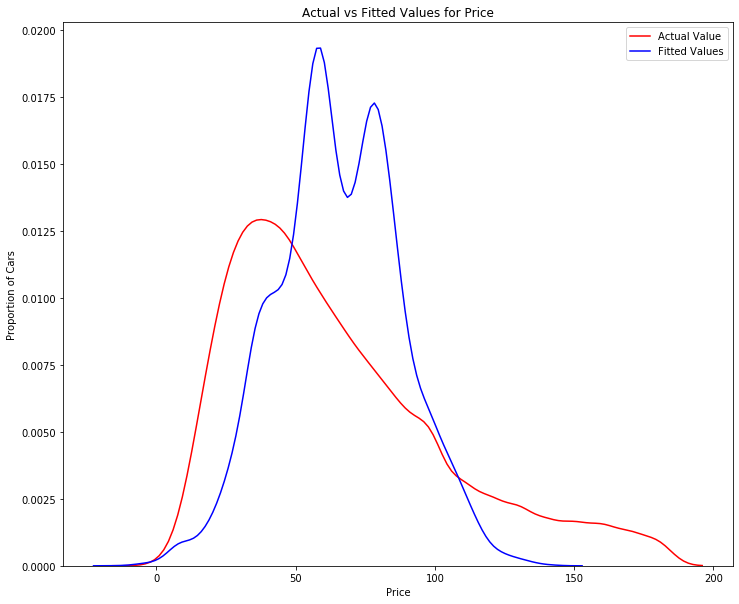

In [79]:
plt.figure(figsize=(12,10))
ax1=sns.distplot(df["price"], hist=False, color="r",label="Actual Value")
sns.distplot(Y_hat,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [87]:
print('The R-square is: ', lm.score(z, df['price']))

The R-square is:  0.3318902483155841


In [88]:
Y_predict_multifit = lm.predict(z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  1002.3423656148807


# Testing the Sklearn Model

In [12]:
df2=pd.read_csv(r"F:\AditiStudy_2020\ProjectUnderProgress\Housing challenge\test.csv")

In [14]:
df2["postedby2"]=df2.postedby.replace({"Owner":1,"Dealer":2,"Builder":3})
df2.drop(["postedby"],inplace=True,axis=1)
df2.drop(["address"],inplace=True,axis=1)

In [13]:
df2["city"]=df2["address"].apply(lambda x:x.split(",")[1])
df2["location"]=df2["address"].apply(lambda x:x.split(",")[0])

In [15]:
df2.head(2)

,uc,rera,bhk,b_r,sq_ft,move_ready,resale,LONGITUDE,LATITUDE,city,location,postedby2
0,0,0,1,BHK,545.17134,1,1,21.262000,73.047700,Surat,Kamrej,1
1,1,1,2,BHK,800.00000,0,0,18.966114,73.148278,Lalitpur,Panvel,2


In [42]:
w=df2[["uc","bhk","sq_ft","rera","move_ready","resale","postedby2","LONGITUDE","LATITUDE"]]

In [43]:
df_dum2=pd.get_dummies(w)

In [82]:
test=lm.predict(w)

In [83]:
pd.DataFrame(test).to_csv('F:\AditiStudy_2020\ProjectUnderProgress\Housing challenge\FinalSubmission3.csv')

In [95]:
df3=pd.read_csv(r"F:\AditiStudy_2020\ProjectUnderProgress\Housing challenge\FinalSubmission3.csv")
df3.head()

,Unnamed: 0,0
0,0,32.890419
1,1,68.081215
2,2,36.936688
3,3,77.282429
4,4,27.582809


# Summary Using Statsmodel.api

In [101]:
import statsmodels.api as sm

In [119]:
df_model=df[['postedby', 'uc', 'rera', 'bhk', 'b_r', 'sq_ft', 'move_ready', 'resale', 'price',"LONGITUDE","LATITUDE"]]

In [120]:
df_dum=pd.get_dummies(df_model)

In [121]:
x=df_dum.drop("price",axis=1)
y=df_dum.price.values

In [122]:
x_sm=x=sm.add_constant(x)

In [123]:
model=sm.OLS(y,x_sm)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     1288.
Date:                Sun, 28 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:42:07   Log-Likelihood:            -1.1132e+05
No. Observations:               22939   AIC:                         2.227e+05
Df Residuals:                   22928   BIC:                         2.227e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              100.9579      3.105     32.513      0.000      94.872     107.044
uc                  51.9312      1.583     32.803      0.000      48.828      55.034
rera                 4.3386      0.496      8.750      0.000       3.367       5.310
bhk                  5.7841      0.489     11.825      0.000       4.825       6.743
sq_ft                0.0339      0.001     41.781      0.000       0.032       0.036
move_ready          49.0268      1.583     30.972      0.000      45.924      52.129
resale              -6.7341      1.067     -6.313      0.000      -8.825      -4.643
LONGITUDE           -1.4020      0.034    -41.595      0.000      -1.468      -1.336
LATITUDE            -2.4928      0.085    -29.474      0.000      -2.659      -2.327
postedby_Builder    19.5463      1.525     12.818      0.000      16.557      22.535
postedby_Dealer     51.7923      1.149     45.057      0.000      49.539      54.045
postedby_Owner      29.6193      1.235     23.986      0.000      27.199      32.040
b_r_BHK             45.1404      2.888     15.628      0.000      39.479      50.802
b_r_RK              55.8175      4.187     13.333      0.000      47.612      64.023
==============================================================================
Omnibus:                     3405.807   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5477.334
Skew:                           1.023   Prob(JB):                         0.00
Kurtosis:                       4.243   Cond. No.                     1.08e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.03e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

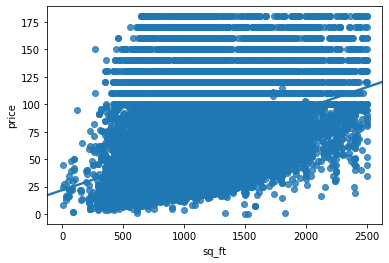

In [124]:
sns.regplot(x="sq_ft",y="price",data=df)

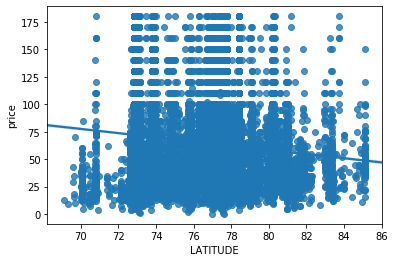

In [126]:
sns.regplot(x="LATITUDE",y="price",data=df)

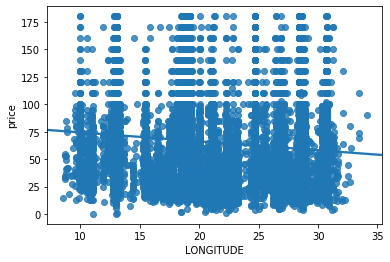

In [127]:
sns.regplot(x="LONGITUDE",y="price",data=df)